🔹 Basic Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142371 entries, 0 to 142370
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   location_id              142371 non-null  int64  
 1   weather_code (wmo code)  142371 non-null  int64  
 2   temperature_max          142371 non-null  float64
 3   temperature_min          142371 non-null  float64
 4   temperature_mean         142371 non-null  float64
 5   apparent_temp_max        142371 non-null  float64
 6   apparent_temp_min        142371 non-null  float64
 7   apparent_temp_mean       142371 non-null  float64
 8   daylight_sec             142371 non-null  float64
 9   sunshine_sec             142371 non-null  float64
 10  precip_sum               142371 non-null  float64
 11  rain_sum                 142371 non-null  float64
 12  precip_hours             142371 non-null  int64  
 13  wind_speed_max           142371 non-null

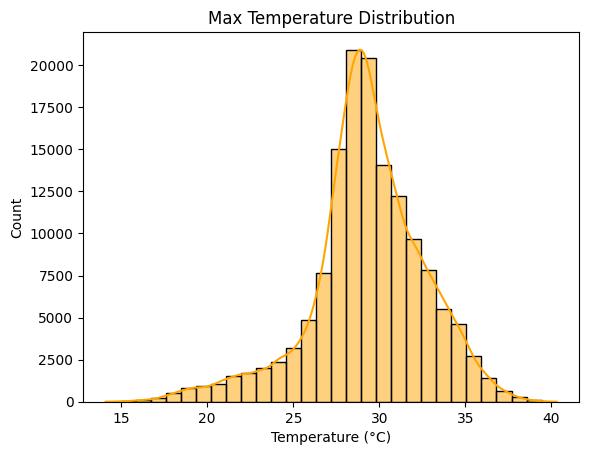

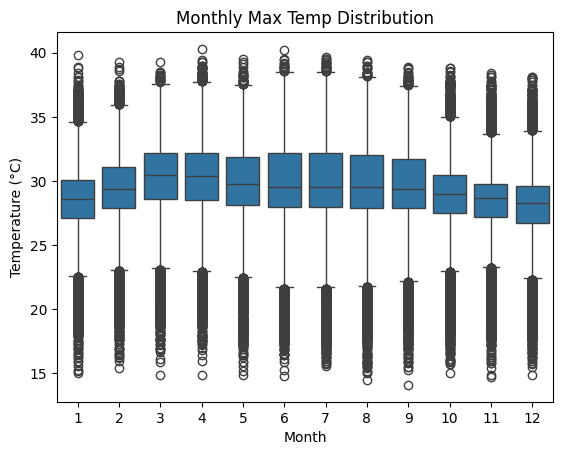

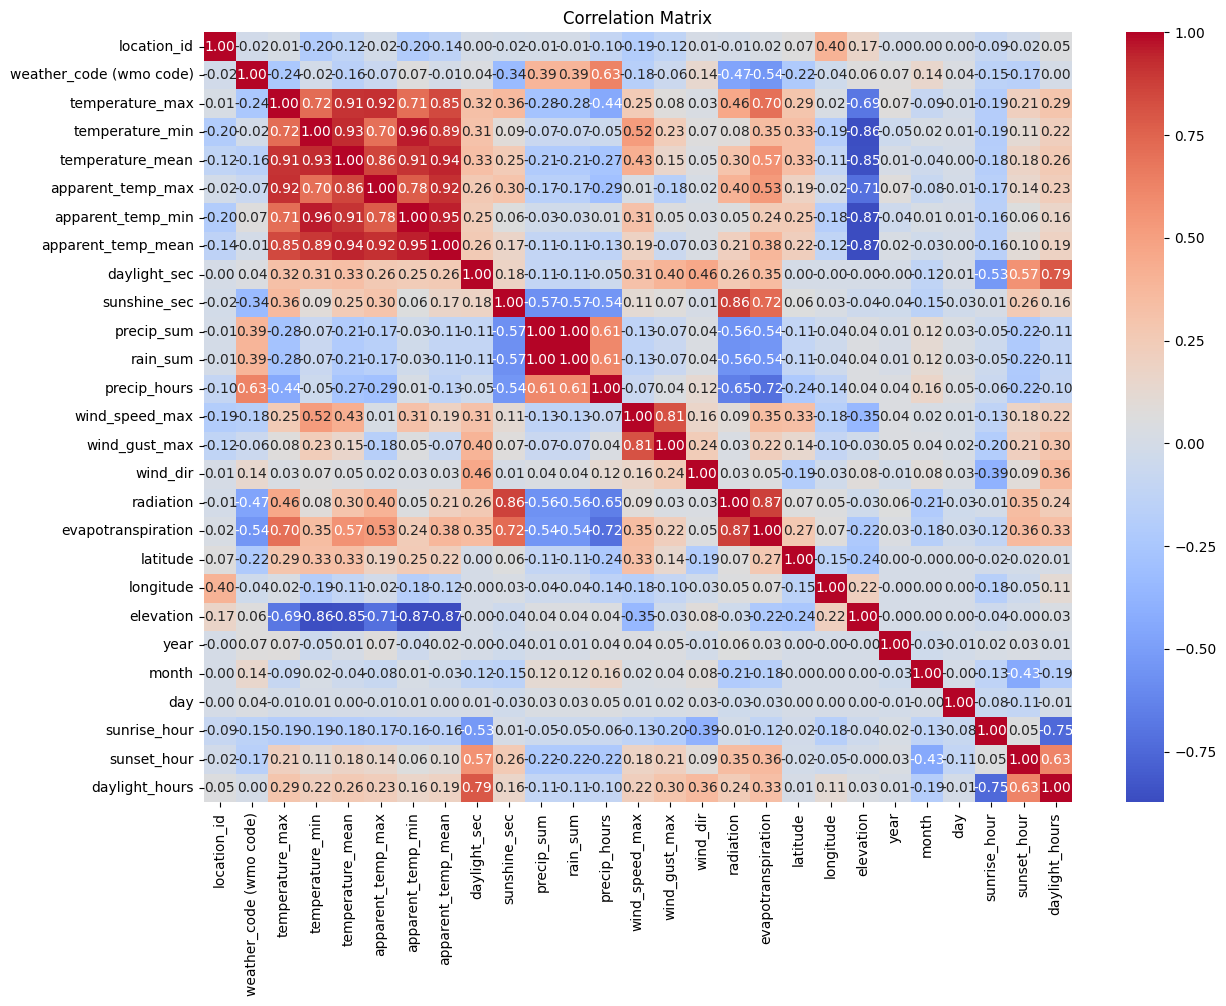

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure output directory exists
os.makedirs("eda_plots", exist_ok=True)

# Load data
df = pd.read_csv('data/cleaned_weather.csv')

# Rename columns for simplicity
df.rename(columns={
    'temperature_2m_max (°C)': 'temperature_max',
    'temperature_2m_min (°C)': 'temperature_min',
    'temperature_2m_mean (°C)': 'temperature_mean',
    'apparent_temperature_max (°C)': 'apparent_temp_max',
    'apparent_temperature_min (°C)': 'apparent_temp_min',
    'apparent_temperature_mean (°C)': 'apparent_temp_mean',
    'daylight_duration (s)': 'daylight_sec',
    'sunshine_duration (s)': 'sunshine_sec',
    'precipitation_sum (mm)': 'precip_sum',
    'rain_sum (mm)': 'rain_sum',
    'precipitation_hours (h)': 'precip_hours',
    'wind_speed_10m_max (km/h)': 'wind_speed_max',
    'wind_gusts_10m_max (km/h)': 'wind_gust_max',
    'wind_direction_10m_dominant (°)': 'wind_dir',
    'shortwave_radiation_sum (MJ/m²)': 'radiation',
    'et0_fao_evapotranspiration (mm)': 'evapotranspiration'
}, inplace=True)

# Basic info
print("🔹 Basic Data Info:")
print(df.info())

print("\n🔹 Descriptive Statistics:")
print(df.describe())

print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Histogram: Max Temperature
sns.histplot(df['temperature_max'], kde=True, bins=30, color='orange')
plt.title("Max Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.savefig("eda_plots/max_temp_dist.png")
plt.show()

# Boxplot: Monthly Max Temp
sns.boxplot(x='month', y='temperature_max', data=df)
plt.title("Monthly Max Temp Distribution")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.savefig("eda_plots/monthly_temp_boxplot.png")
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("eda_plots/correlation_heatmap.png")
plt.show()
